In [1]:
!conda install -c conda-forge catboost -y

Channels:
 - conda-forge
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.38.0             |       h1d18e73_1         359 KB  conda-forge
    ca-certificates-2024.7.4   |       h8857fd0_0         151 KB  conda-forge
    cairo-1.16.0               |       h3ce6f7e_5        1013 KB
    catboost-1.2.5             |  py312hb401068_0        18.5 MB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge
    conda-24.5.0               |  py312hb401068_0         1.2 MB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0       

In [2]:
import catboost
print(catboost.__version__)

1.2.5


In [1]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/scaled_data.csv'
df = pd.read_csv(data_path)

# 特徴量の選択
important_features = [
    'OverallQual_Capped',  'OverallHomeQuality', 'FunctionalSpace', 
    'GarageQuality', 'capped_log_GrLivArea', 'TotalBath_Capped',
    'OverallCond', 'GarageCars_Capped', 'BsmtExposureQual', 'YearBuilt_Capped',
    'BasementQualityInteraction', 'log_TotalBsmtSF_Capped',
    'HouseAge', 'OutdoorSpaceQuality', 'PorchAndDeckArea', 'LotArea' 
]

# データセットの作成
X = df[important_features]
y = df['SalePrice']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# CatBoostRegressorのインスタンスを作成
cbr = CatBoostRegressor(random_state=21, silent=True)

# ハイパーパラメータの設定
param_grid = {
    'iterations': [200, 500, 1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# グリッドサーチ
grid_search = GridSearchCV(estimator=cbr, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 最適なモデル
catboost_best = grid_search.best_estimator_

# 予測の実行
y_pred = catboost_best.predict(X_test)

# 最適なハイパーパラメータの表示
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation MAE: {-grid_search.best_score_:.4f}")


# 評価指標の計算
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# 結果の表示
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# モデルの保存
model_path = '/Users/hayakawakazue/Downloads/house_price/model/catboost_model_0721_1.joblib'
joblib.dump(catboost_best, model_path)

print(f"最適なCatBoostモデルが保存されました: {model_path}")

# 実際の値の平均を計算
mean_actual_value = np.mean(y_test)
print(f"Mean Actual Value: {mean_actual_value:.4f}")

# 誤差のパーセンテージを計算
error_percentage = (mae / mean_actual_value) * 100
print(f"Mean Absolute Percentage Error (MAPE): {error_percentage:.2f}%")



Best parameters found: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best cross-validation MAE: 15636.3946
Mean Absolute Error (MAE): 16840.3808
Mean Squared Error (MSE): 1317135780.8492
R-squared (R2): 0.7886
Root Mean Squared Error (RMSE): 36292.3653
最適なCatBoostモデルが保存されました: /Users/hayakawakazue/Downloads/house_price/model/catboost_model_0721_1.joblib
Mean Actual Value: 176202.5799
Mean Absolute Percentage Error (MAPE): 9.56%


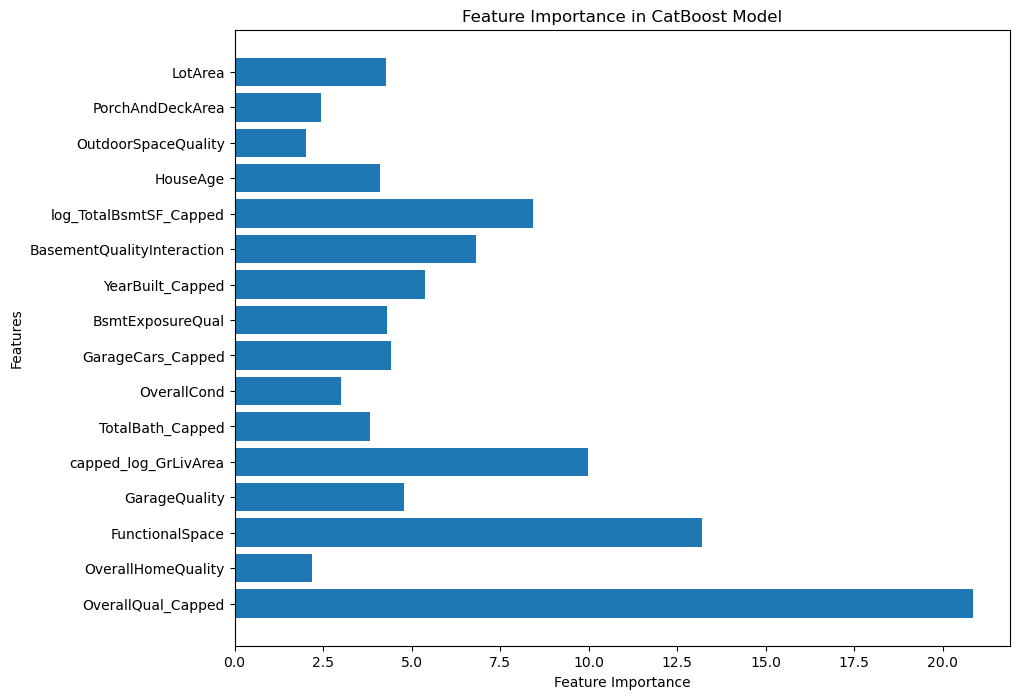

In [2]:
import matplotlib.pyplot as plt

# 特徴量の重要度を取得
feature_importances = best_catboost_reg.get_feature_importance(Pool(X_train, y_train))
feature_names = X.columns

# 可視化
plt.figure(figsize=(10, 8))
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in CatBoost Model")
plt.show()
